# Analyzing Job Demand

In [1]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [5]:
df_indonesia = df[df['job_country'] == 'Indonesia'].copy()

In [8]:
df_indonesia['job_posted_month'] = df_indonesia['job_posted_date'].dt.strftime('%B') 

In [55]:
df_indo_pivot = df_indonesia.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_indo_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,5,3,20,46,28,2,1,9,8,14
August,12,5,32,78,46,1,3,5,5,15
December,9,22,55,77,75,5,7,8,12,50
February,9,2,25,78,44,5,4,12,5,18
January,14,9,35,117,80,8,5,10,19,14
July,11,3,25,58,46,9,4,8,3,20
June,11,4,22,66,32,4,1,8,9,8
March,6,5,21,90,36,2,1,13,5,14
May,11,9,25,79,39,3,2,8,9,4


In [56]:
df_indo_pivot.reset_index(inplace=True)
df_indo_pivot['month_no'] = pd.to_datetime(df_indo_pivot['job_posted_month'], format='%B').dt.month

In [ ]:
df_indo_pivot.sort_values('month_no', inplace=True)
df_indo_pivot.set_index('job_posted_month',inplace=True)
df_indo_pivot.drop(columns='month_no', inplace=True)

KeyError: "['index'] not found in axis"

In [59]:
df_indo_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,14,9,35,117,80,8,5,10,19,14
February,9,2,25,78,44,5,4,12,5,18
March,6,5,21,90,36,2,1,13,5,14
April,5,3,20,46,28,2,1,9,8,14
May,11,9,25,79,39,3,2,8,9,4
June,11,4,22,66,32,4,1,8,9,8
July,11,3,25,58,46,9,4,8,3,20
August,12,5,32,78,46,1,3,5,5,15
September,4,7,34,83,50,6,5,10,8,9


In [66]:
top_3 = df_indonesia['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

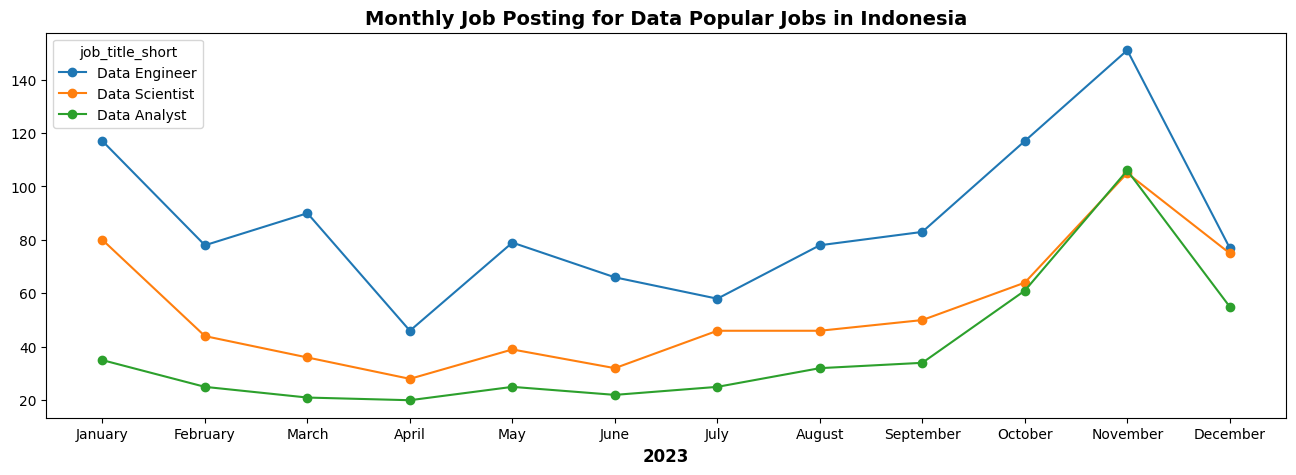

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 5))

df_indo_pivot[top_3].plot(kind='line', ax=ax, marker='o')

ax.set_xticks(range(len(df_indo_pivot.index)))  # Indeks numerik 0–11
ax.set_xticklabels(df_indo_pivot.index, rotation=0)

plt.title('Monthly Job Posting for Data Popular Jobs in Indonesia', fontsize=14, fontweight='bold')
plt.xlabel('2023', fontsize=12, fontweight='bold')
plt.show()